In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


### There are no null values

<AxesSubplot:>

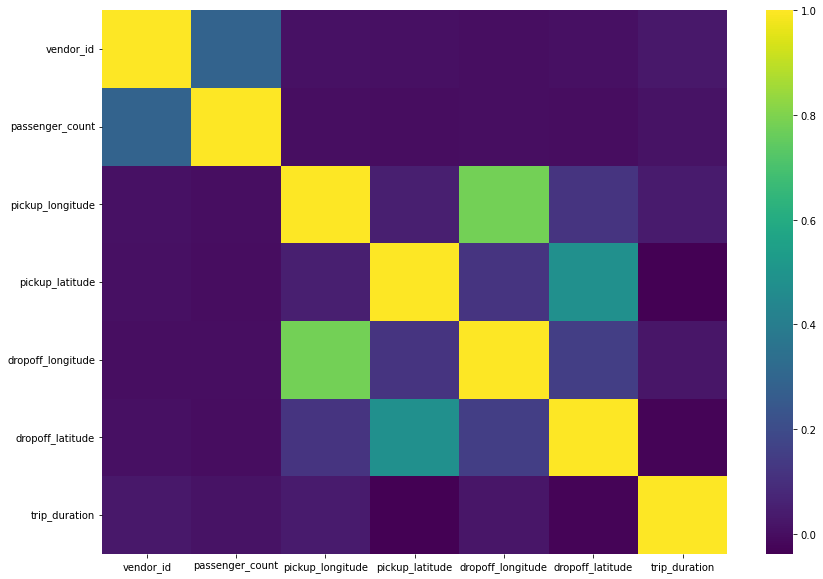

In [5]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap='viridis')

### Here we see dropoff and pickup longitude  are highly correlated because this is about single city and they lie on same longitude

In [6]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  729322 non-null  object        
 1   vendor_id           729322 non-null  int64         
 2   pickup_datetime     729322 non-null  datetime64[ns]
 3   dropoff_datetime    729322 non-null  datetime64[ns]
 4   passenger_count     729322 non-null  int64         
 5   pickup_longitude    729322 non-null  float64       
 6   pickup_latitude     729322 non-null  float64       
 7   dropoff_longitude   729322 non-null  float64       
 8   dropoff_latitude    729322 non-null  float64       
 9   store_and_fwd_flag  729322 non-null  object        
 10  trip_duration       729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 61.2+ MB


## Lets check the datetime features to analyse the when the travel was carried out

In [38]:
print(f"The trips are taken in {df['pickup_datetime'].dt.year.value_counts()}")
print(f"The trips are taken in {df['dropoff_datetime'].dt.year.value_counts()}")

The trips are taken in 2016    729322
Name: pickup_datetime, dtype: int64
The trips are taken in 2016    729322
Name: dropoff_datetime, dtype: int64


#### As we see the trips are carried down in 2016 so we dont need the year as a feature

## Months in the Year

The trips are taken in months starting from January till June 
3    128316
4    125634
5    124201
2    119364
6    117406
1    114401
Name: pickup_datetime, dtype: int64


<AxesSubplot:>

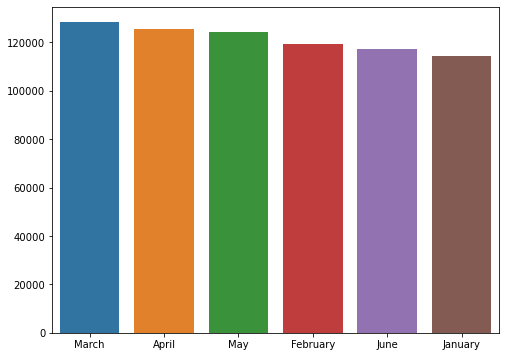

In [126]:
print(f"The trips are taken in months starting from January till June \n{df['pickup_datetime'].dt.month.value_counts()}")
plt.figure(figsize=(8,6))
sns.barplot(x=df['pickup_datetime'].dt.strftime('%B').value_counts().index,data=df,y=df['pickup_datetime'].dt.strftime('%B').value_counts().values)

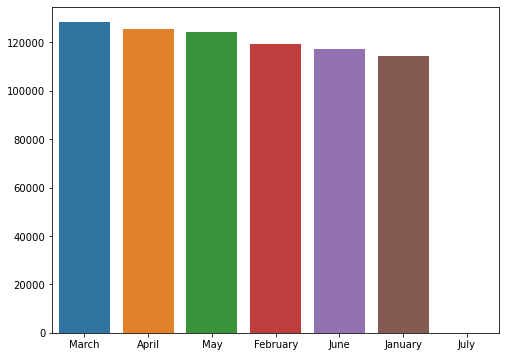

The trips are taken in the months starting from January till July
3    128284
4    125633
5    124236
2    119361
6    117380
1    114375
7        53
Name: dropoff_datetime, dtype: int64


In [127]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['dropoff_datetime'].dt.strftime('%B').value_counts().index,data=df,y=df['dropoff_datetime'].dt.strftime('%B').value_counts().values)
plt.show()
print(f"The trips are taken in the months starting from January till July\n{df['dropoff_datetime'].dt.month.value_counts()}")

#### We can see that trips have been carried in the first half of the year from January to June and this feature will help in the extraction

## Day of the Week

The trips are taken in 
0     93972
1    101254
2    105074
3    109344
4    111744
5    110252
6     97682
Name: pickup_datetime, dtype: int64


<AxesSubplot:>

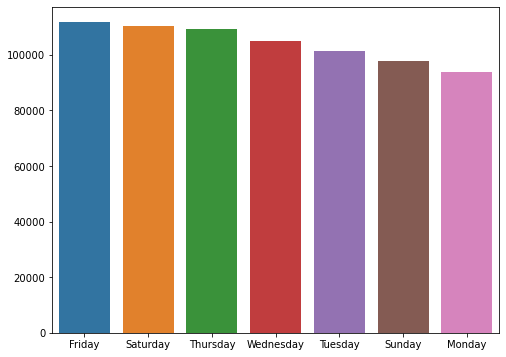

In [128]:
print(f"The trips are taken in \n{df['pickup_datetime'].dt.weekday.value_counts().sort_index()}")
plt.figure(figsize=(8,6))
sns.barplot(x=df['pickup_datetime'].dt.strftime('%A').value_counts().index,data=df,y=df['pickup_datetime'].dt.strftime('%A').value_counts().values)

The trips are taken in 
0     93959
1    101142
2    104944
3    108918
4    111509
5    110289
6     98561
Name: dropoff_datetime, dtype: int64


<AxesSubplot:>

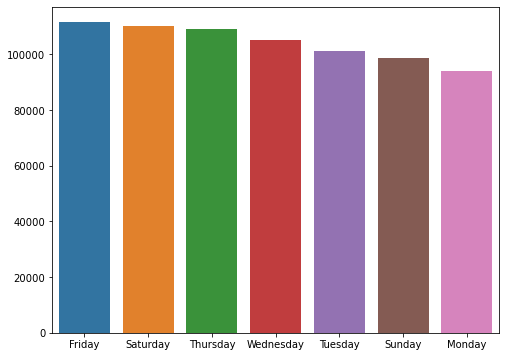

In [129]:
print(f"The trips are taken in \n{df['dropoff_datetime'].dt.weekday.value_counts().sort_index()}")
plt.figure(figsize=(8,6))
sns.barplot(x=df['dropoff_datetime'].dt.strftime('%A').value_counts().index,data=df,y=df['dropoff_datetime'].dt.strftime('%A').value_counts().values)

#### As we can see the rides are taken mostly on Friday and Saturday compared to other days but distribution is pretty much what we expect

### Days of the month

The trips are taken in 


<AxesSubplot:>

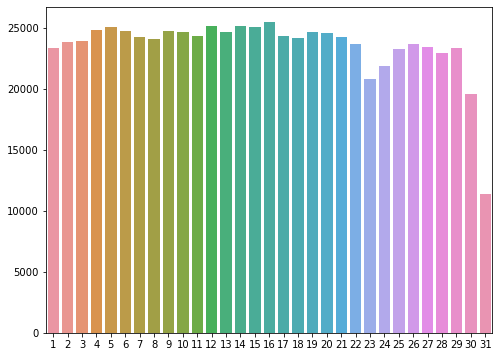

In [132]:
print(f"The trips are taken in ")
plt.figure(figsize=(8,6))
sns.barplot(x=df['dropoff_datetime'].dt.day.value_counts().index,data=df,y=df['dropoff_datetime'].dt.day.value_counts().values)

The trips are taken in 



<AxesSubplot:>

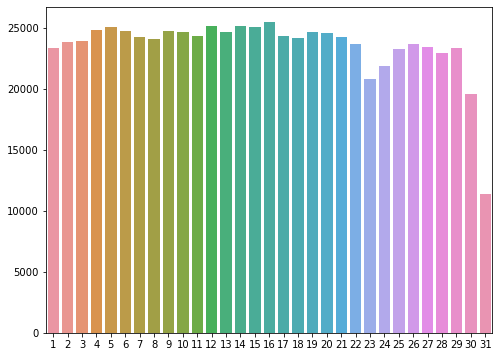

In [131]:
print(f"The trips are taken in \n")
plt.figure(figsize=(8,6))
sns.barplot(x=df['dropoff_datetime'].dt.day.value_counts().index,data=df,y=df['dropoff_datetime'].dt.day.value_counts().values)

## Lets look into passenger count

In [146]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [157]:
df['passenger_count'].value_counts().values

array([517415, 105097,  38926,  29692,  24107,  14050,     33,      1,
            1], dtype=int64)

<AxesSubplot:>

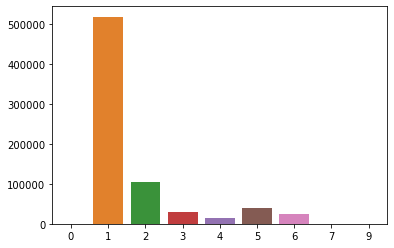

In [147]:
sns.barplot(data=df,x=df['passenger_count'].value_counts().sort_index().index.values,y=df['passenger_count'].value_counts().sort_index().values)

### We can see majority of the passenger count is 1 and followed by 2 passengers

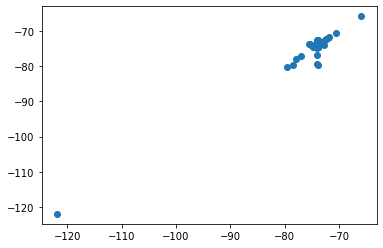

In [168]:
plt.scatter(x=df['pickup_longitude'],y=df['dropoff_longitude'])

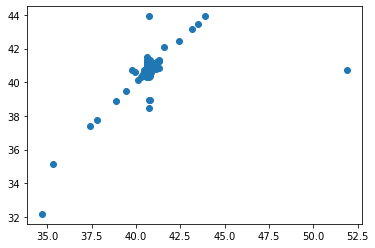

In [169]:
plt.scatter(x=df['pickup_latitude'],y=df['dropoff_latitude'])

## Lets check the flag counts

<AxesSubplot:>

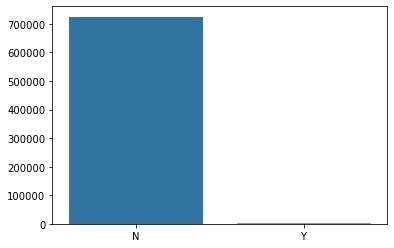

In [174]:
sns.barplot(data=df,x=df['store_and_fwd_flag'].value_counts().index.values,y=df['store_and_fwd_flag'].value_counts().values)

### We can see that majority of the trips had proper connections to netwrok and trip was recorded

## Lets check the trip duration

<AxesSubplot:xlabel='trip_duration', ylabel='count'>

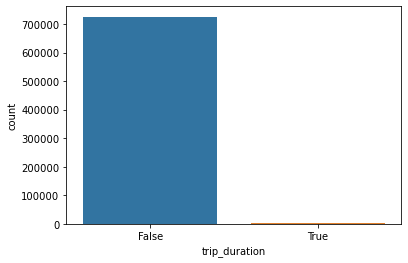

In [201]:
sns.countplot(df['trip_duration']<60)

### We can see that few of the trips have ride less than a minute which could signify that trip dint start as taxi cant travel anywhere within a minute